In [77]:
#preamble
%matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn import neighbors
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split

cmap_bold = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])




Data Sets

In [78]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap

from sklearn.datasets import load_breast_cancer, load_diabetes, load_iris

#Synthetic data sets
#simple regression
from sklearn.datasets import make_regression
X_R1, y_R1 = make_regression(n_samples = 100, n_features=1,
                            n_informative=1, bias = 150.0,
                            noise = 30, random_state=0)

#complex regression
from sklearn.datasets import make_friedman1
X_F1, y_F1 = make_friedman1(n_samples = 100,
                           n_features = 7, random_state=0)

#binary binary classifier
X_C2, y_C2 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#complex binary classifier
X_D2, y_D2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,
                       cluster_std = 1.3, random_state = 4)
y_D2 = y_D2 % 2


# SciKitLearn Datasets, raw data as np arrays
#Regression
diabetes = load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]

#biclassification
cancer = load_breast_cancer()
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#multiclassification
iris = load_iris()

In [79]:
#Can install graphviz on windwos?? Can't visualize decision trees
#from utilities import load_crime_data
#(X_crime, y_crime) = load_crime_dataset()

K Nearest Neighbor
* Can be used for both classification and regression
* lower K values make models with higher complexity
* pros: simple, easy to understand, reasonable baseline. cons: doesn't work well with many features or large data sets, especially if data is sparse
* important parameters: 1. n-neighbors, distance metric (ex. euclidean distance)

<IPython.core.display.Javascript object>


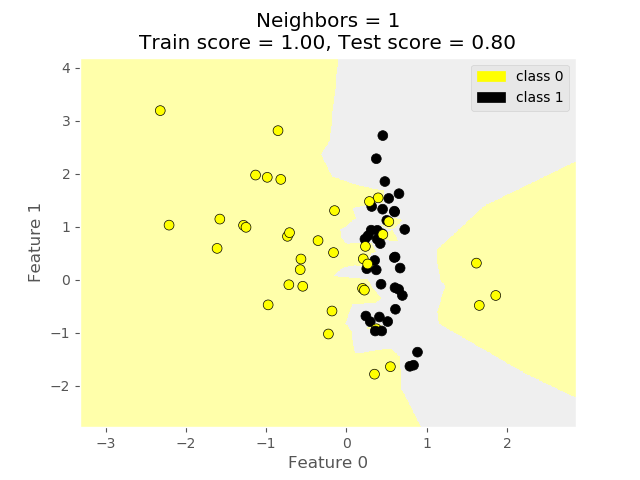

<IPython.core.display.Javascript object>


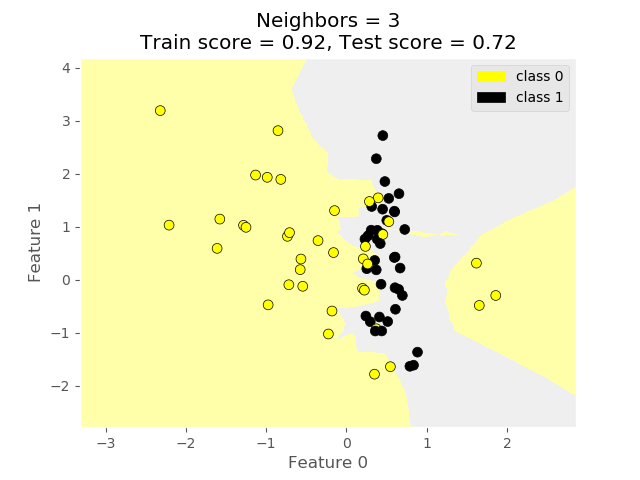

<IPython.core.display.Javascript object>


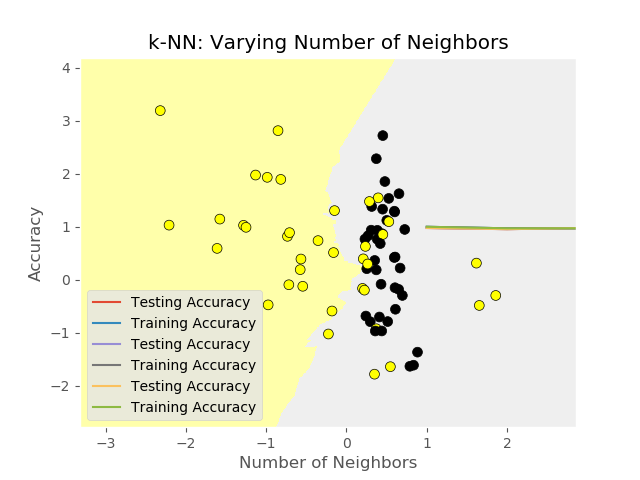

In [80]:
#KNN classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_C2, y_C2,
                                                   random_state=0)


def plot_two_class_knn(X, y, n_neighbors, weights, X_test, y_test):
    X_mat = X
    y_mat = y

    # Create color maps
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold  = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                         np.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    title = "Neighbors = {}".format(n_neighbors)
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    patch0 = mpatches.Patch(color='#FFFF00', label='class 0')
    patch1 = mpatches.Patch(color='#000000', label='class 1')
    plt.legend(handles=[patch0, patch1])

    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(title)

    plt.show()

plot_two_class_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_two_class_knn(X_train, y_train, 11, 'uniform', X_test, y_test)

In [19]:
#KNN Regression
from sklearn.neighbors import KNeighborsRegressor

X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1, random_state = 0)

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-squared test score: {:.3f}'
     .format(knnreg.score(X_test, y_test)))

[231.70974697 148.35572605 150.58852659 150.58852659  72.14859259
 166.50590948 141.90634426 235.57098756 208.25897836 102.10462746
 191.31852674 134.50044902 228.32181403 148.35572605 159.16911306
 113.46875166 144.03646012 199.23189853 143.19242433 166.50590948
 231.70974697 208.25897836 128.01545355 123.14247619 141.90634426]
R-squared test score: 0.425


LINEAR MODELS:
1. Regression - least squares
2. Classification - logistic regression

In [7]:
#Least Squares Linear Regression

from sklearn.linear_model import LinearRegression

#using this data set, automatically generates y labels, need to implement y selection from dataframe
X_train, X_test, y_train, y_test = train_test_split(X_R1, y_R1,
                                                   random_state = 0)
linreg = LinearRegression().fit(X_train, y_train)

print('linear model coeff (w): {}'
     .format(linreg.coef_))
print('linear model intercept (b): {:.3f}'
     .format(linreg.intercept_))
print('R-squared score (training): {:.3f}'
     .format(linreg.score(X_train, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linreg.score(X_test, y_test)))

linear model coeff (w): [45.70870465]
linear model intercept (b): 148.446
R-squared score (training): 0.679
R-squared score (test): 0.492


In [26]:
#classification
#explore data
iris

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [22]:
#similar to a dictionary
type(iris)

sklearn.utils.Bunch

In [23]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [24]:
type(iris.data), type(iris.target)

(numpy.ndarray, numpy.ndarray)

In [25]:
iris.data.shape

(150, 4)

In [27]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [102]:
X = iris.data
y = iris.target
df = pd.DataFrame(X, columns=iris.feature_names)

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


<IPython.core.display.Javascript object>


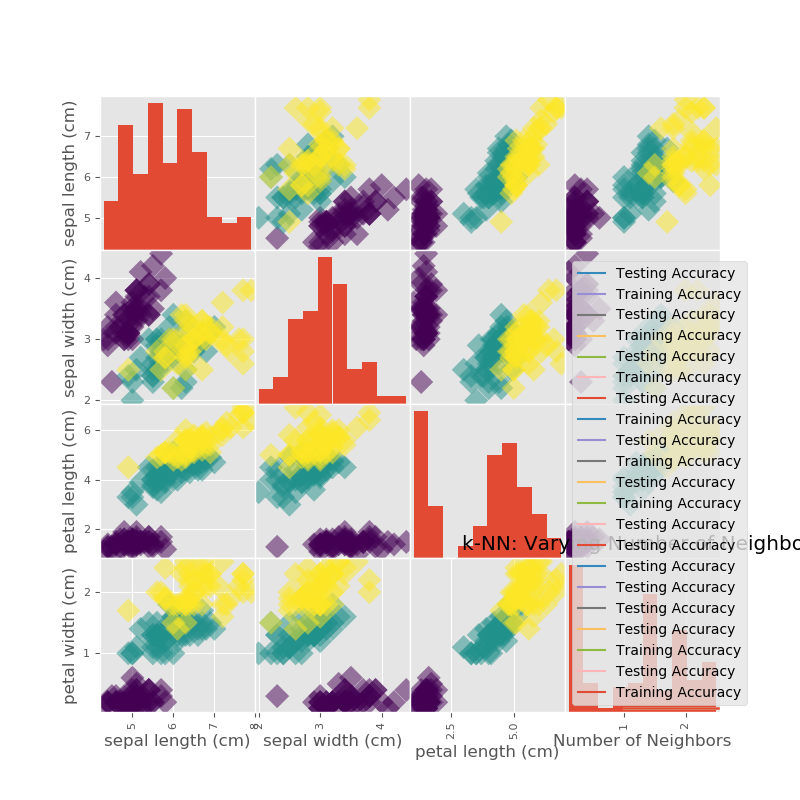

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029E8FE48588>,
      dtype=object)

In [32]:
pd.plotting.scatter_matrix(df, c = y, figsize = [8,8], s=150, marker='D')

In [33]:
knn = KNeighborsClassifier(n_neighbors=6)

In [35]:
#pass in features and target as np arrays (scikit requires data as np array or pandas df)
#cannot pass in categorical data and cannot have missing features
knn.fit(iris['data'], iris['target'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [46]:
X_new = np.array([[3, 2, 2, 3]])
prediction = knn.predict(X_new)

In [49]:
print('Prediction: {}'.format(prediction))

Prediction: [1]


In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=21, stratify=y)

In [104]:
knn = KNeighborsClassifier(n_neighbors=8)

In [105]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform')

In [54]:
y_pred = knn.predict(X_test)

In [55]:
print('Test set predictions:\n {}'.format(y_pred))

Test set predictions:
 [2 1 2 2 1 0 1 0 0 1 0 2 0 2 2 0 0 0 1 0 2 2 2 0 1 1 1 0 0 1 2 2 0 0 1 2 2
 1 1 2 1 1 0 2 1]


In [56]:
knn.score(X_test, y_test)

0.9555555555555556

In [106]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3,random_state=21, stratify=y)

k_n_neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(k_n_neighbors))
test_accuracy = np.empty(len(k_n_neighbors))

In [107]:
for i, k in enumerate(k_n_neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)
    print(i,k)


0 1
1 2
2 3
3 4
4 5
5 6
6 7
7 8


In [109]:
# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(k_n_neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_n_neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')

Text(44.2222,0.5,'Accuracy')